# Modeling - Panel Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from linearmodels.panel import PanelOLS
import os
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from itertools import product
from linearmodels.panel import PanelOLS
import pickle

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

In [2]:
df_test = pd.read_pickle("feature_engineering_test_dataset.pkl")

display(df_test.head(3))
print("Shape: ", df_test.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,dummy_south_dakota,dummy_tennessee,dummy_texas,dummy_utah,dummy_vermont,dummy_virginia,dummy_washington,dummy_west_virginia,dummy_wisconsin,dummy_wyoming
0,2021-02-09,10001,36.782852,15.779060,7.452131,71.744309,63.479295,31.768168,60.557307,40.272843,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-10,10001,33.319952,12.837715,2.041177,72.171535,65.314007,28.528320,63.845535,38.435611,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-11,10001,36.710308,14.203521,2.125673,68.555617,64.170146,31.020100,64.243291,39.718812,...,0,0,0,0,0,0,0,0,0,0


Shape:  (1560, 105)


In [3]:
list_drop_cols = ['smoothed_wvaccine_likely_who','smoothed_wwearing_mask','smoothed_wcovid_vaccinated_or_accept'
                  ,'smoothed_wvaccine_likely_who_rolling_mean_3','smoothed_wwearing_mask_rolling_mean_3','smoothed_wcovid_vaccinated_or_accept_rolling_mean_3'
                  ,'smoothed_wvaccine_likely_who_lag_3','smoothed_wwearing_mask_lag_3','smoothed_wcovid_vaccinated_or_accept_lag_3',
                  'dummy_delaware',
                  'dummy_district_of_columbia',
                  'dummy_florida',
                  'dummy_georgia',
                  'dummy_idaho',
                  'dummy_illinois',
                  'dummy_indiana',
                  'dummy_iowa',
                  'dummy_kansas',
                  'dummy_kentucky',
                  'dummy_louisiana',
                  'dummy_maine',
                  'dummy_maryland',
                  'dummy_massachusetts',
                  'dummy_michigan',
                  'dummy_minnesota',
                  'dummy_mississippi',
                  'dummy_missouri',
                  'dummy_montana',
                  'dummy_nebraska',
                  'dummy_nevada',
                  'dummy_new_hampshire',
                  'dummy_new_jersey',
                  'dummy_new_mexico',
                  'dummy_new_york',
                  'dummy_north_carolina',
                  'dummy_north_dakota',
                  'dummy_ohio',
                  'dummy_oklahoma',
                  'dummy_oregon',
                  'dummy_pennsylvania',
                  'dummy_rhode_island',
                  'dummy_south_carolina',
                  'dummy_south_dakota',
                  'dummy_tennessee',
                  'dummy_texas',
                  'dummy_utah',
                  'dummy_vermont',
                  'dummy_virginia',
                  'dummy_washington',
                  'dummy_west_virginia',
                  'dummy_wisconsin',
                  'dummy_wyoming']

In [4]:
df_test = df_test.drop(columns = list_drop_cols)
print("Shape: ", df_test.shape)

Shape:  (1560, 53)


In [5]:
target_var = 'smoothed_wcovid_vaccinated'
list_features = [col for col in df_test.columns if col not in ["time_value",'geo_value','state','county_name'
                                                                ,'day_of_week','day','week_of_month',target_var]]

In [6]:
list_scale = [col for col in list_features if 'dummy' not in col]
list_scale[-5:]

['smoothed_wcli_lag_3_x_smoothed_wwork_outside_home_1d',
 'smoothed_wothers_masked_x_smoothed_wcovid_vaccinated_or_accept',
 'smoothed_wtested_14d_x_smoothed_wvaccine_likely_govt_health',
 'smoothed_wcli_x_smoothed_wcovid_vaccinated_or_accept',
 'smoothed_wcovid_vaccinated_or_accept_x_smoothed_wvaccine_likely_friends']

In [9]:
list_all_faeture = list_features.copy()
list_all_faeture.append("constant")
df_test['constant'] = 1.0

In [10]:
with open(current_dir + r"\PanelRegression_Experiment_02.pkl", "rb") as f:
    best_model = pickle.load(f)

In [11]:
test_preds = best_model.predict(df_test.set_index(['geo_value', 'time_value'])[list_all_faeture])
display(test_preds.head(10))
print("Shape :", test_preds.shape)

predictions
geo_value time_value             
10001     2021-02-09    23.777558
          2021-02-10    22.797104
          2021-02-11    24.173838
          2021-02-12    23.785384
10003     2021-02-09    21.522973
          2021-02-10    20.589079
          2021-02-11    18.133720
          2021-02-12    17.828382
10005     2021-02-09    22.335623
          2021-02-10    25.156163

Shape : (1560, 1)


In [12]:
aligned_y_test = df_test.set_index(['geo_value', 'time_value']).loc[test_preds.index][[target_var]]
display(aligned_y_test.head(10))
print("Shape :", aligned_y_test.shape)

smoothed_wcovid_vaccinated
geo_value time_value                            
10001     2021-02-09                   23.062367
          2021-02-10                   24.843072
          2021-02-11                   22.970572
          2021-02-12                   24.430396
10003     2021-02-09                   19.038024
          2021-02-10                   17.313064
          2021-02-11                   17.974378
          2021-02-12                   18.505835
10005     2021-02-09                   26.483328
          2021-02-10                   25.667340

Shape : (1560, 1)


In [13]:
rmse = root_mean_squared_error(aligned_y_test, test_preds)
print(f"Test RMSE: {rmse:.4f}")

Test RMSE: 1.7410


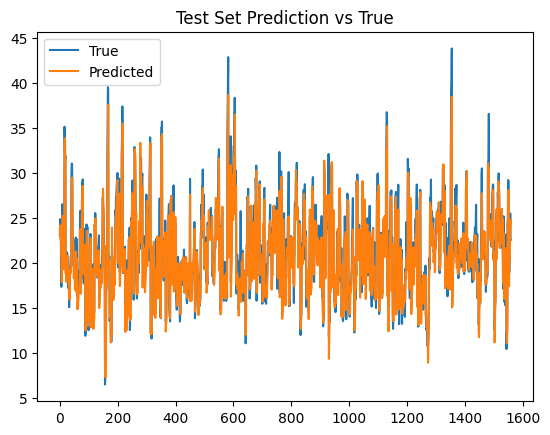

In [14]:
import matplotlib.pyplot as plt

plt.plot(aligned_y_test['smoothed_wcovid_vaccinated'].values, label="True")
plt.plot(test_preds['predictions'].values, label="Predicted")
plt.title("Test Set Prediction vs True")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Residual Distribution')

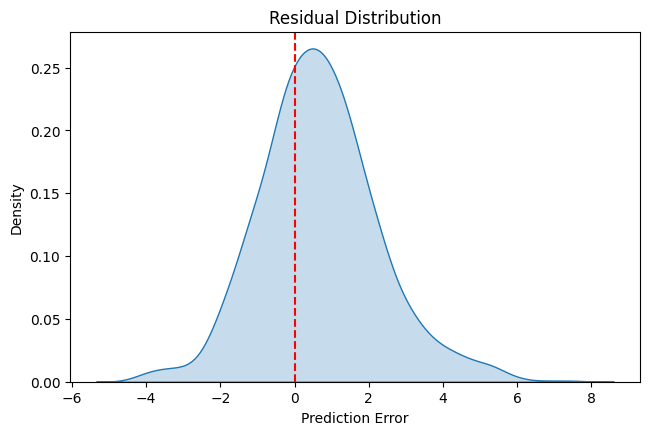

In [15]:
plt.figure(figsize=(25, 10))
plt.subplot(234)
sns.kdeplot(aligned_y_test['smoothed_wcovid_vaccinated'].values - test_preds['predictions'].values, 
            label='Residual', fill=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.title('Residual Distribution')